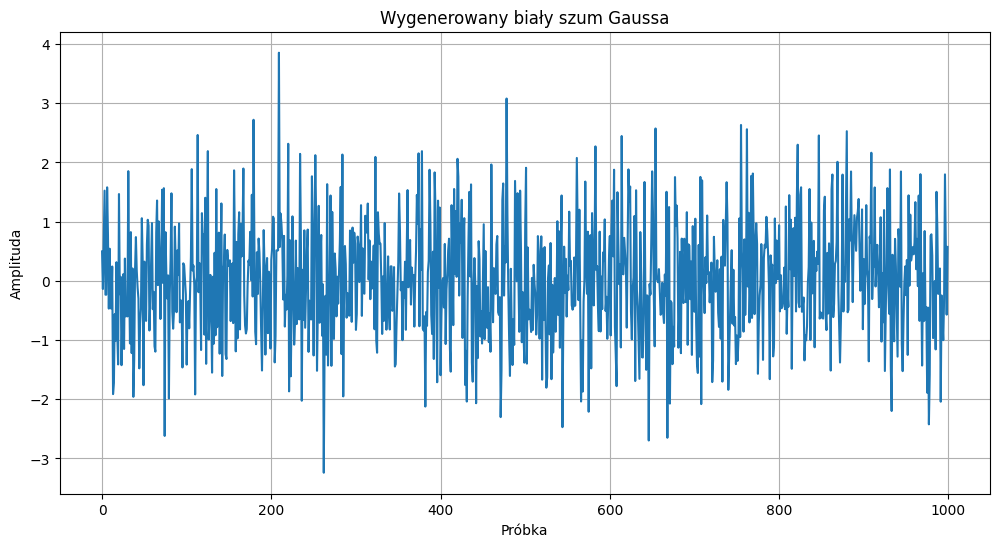


Porównanie modeli:
Model      AIC             Residual Variance    Parameters                    
AR(1)      2800.81         0.957851             [ 0.0193 -0.0075  0.9578]     
AR(2)      2802.81         0.957851             [ 1.930e-02 -7.500e-03 -3.000e-04  9.578e-01]
MA(1)      2800.81         0.957851             [ 0.0193 -0.0075  0.9578]     


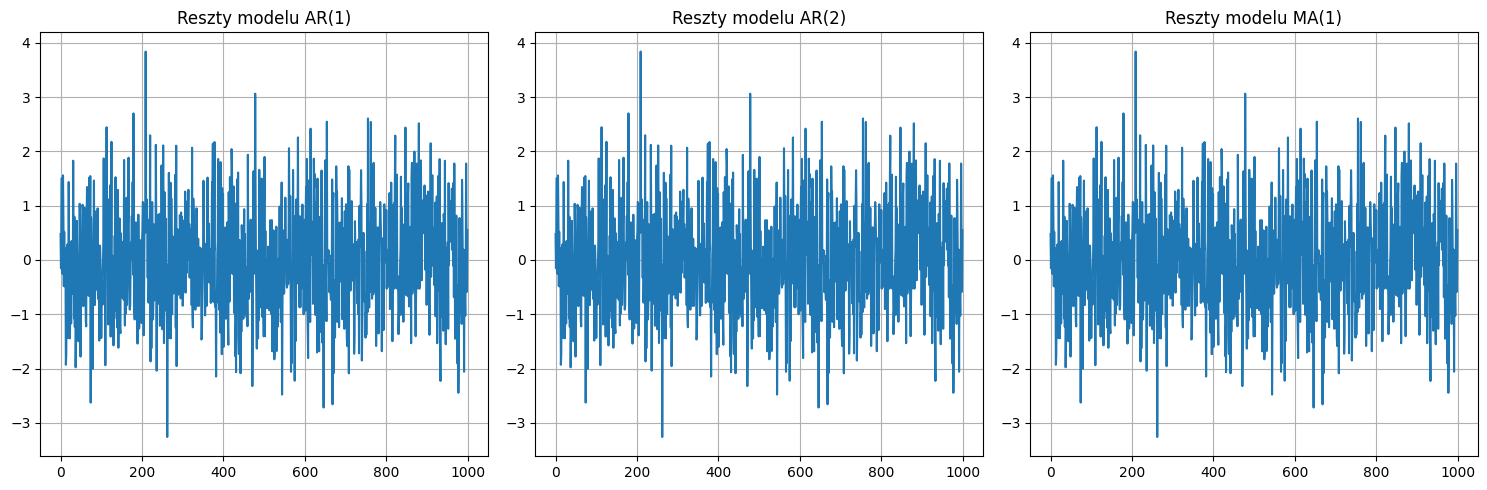

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.regression.linear_model import yule_walker

# 1. Generate white Gaussian noise signal
np.random.seed(42) 
N = 1000  
white_noise = np.random.normal(0, 1, N) 


plt.figure(figsize=(12, 6))
plt.plot(white_noise)
plt.title('Wygenerowany biały szum Gaussa')
plt.xlabel('Próbka')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# 2. Fit AR(1), AR(2) and MA(1) models

# AR(1) model
ar1_model = ARIMA(white_noise, order=(1, 0, 0))  # (p=1, d=0, q=0) dla AR(1)
ar1_result = ar1_model.fit()

# AR(2) model
ar2_model = ARIMA(white_noise, order=(2, 0, 0))  # (p=2, d=0, q=0) dla AR(2)
ar2_result = ar2_model.fit()

# MA(1) model
ma1_model = ARIMA(white_noise, order=(0, 0, 1))  # (p=0, d=0, q=1) dla MA(1)
ma1_result = ma1_model.fit()

# 3. Compare model quality using AIC and residual variance
results = {
    'Model': ['AR(1)', 'AR(2)', 'MA(1)'],
    'AIC': [ar1_result.aic, ar2_result.aic, ma1_result.aic],
    'Residual Variance': [
        np.var(ar1_result.resid),
        np.var(ar2_result.resid),
        np.var(ma1_result.resid)
    ],
    'Parameters': [
        ar1_result.params,
        ar2_result.params,
        ma1_result.params
    ]
}

print("\nPorównanie modeli:")
print("{:<10} {:<15} {:<20} {:<30}".format('Model', 'AIC', 'Residual Variance', 'Parameters'))
for i in range(3):
    print("{:<10} {:<15.2f} {:<20.6f} {:<30}".format(
        results['Model'][i],
        results['AIC'][i],
        results['Residual Variance'][i],
        str(results['Parameters'][i].round(4))
    ))

# Wykresy reszt modeli
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(ar1_result.resid)
plt.title('Reszty modelu AR(1)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(ar2_result.resid)
plt.title('Reszty modelu AR(2)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(ma1_result.resid)
plt.title('Reszty modelu MA(1)')
plt.grid(True)

plt.tight_layout()
plt.show()